In [7]:
# Task 1

#importing module
import pandas as pd

#Loading data
df= pd.read_csv("ship_data.csv")

#Checking data
df.head()

,MMSI,Speed (knots),COG (degrees),Destination,Ship type,Gross tonnage,Length (m),Breadth (m)
0,236039000,10.1,74.9,Hamina,Cargo,2280,82.6,12.3
1,440363000,9.9,74.6,Hamina,Cargo,8521,136.0,32.0
2,235009040,8.4,65.8,Hamina,Cargo,3978,1000.0,16.5
3,246591000,9.2,74.6,Hamina,Cargo,8620,137.1,19.1
4,305929000,9.6,73.2,Hamina,Cargo,1905,87.9,11.4


In [8]:
#Checking data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 8 columns):
MMSI             107 non-null int64
Speed (knots)    107 non-null float64
COG (degrees)    107 non-null float64
Destination      107 non-null object
Ship type        107 non-null object
Gross tonnage    107 non-null int64
Length (m)       107 non-null float64
Breadth (m)      107 non-null float64
dtypes: float64(4), int64(2), object(2)
memory usage: 6.8+ KB


In [6]:
#Checking data
df.describe()

,MMSI,Speed (knots),COG (degrees),Gross tonnage,Length (m),Breadth (m)
count,1.070000e+02,107.000000,107.000000,107.000000,107.000000,107.000000
mean,3.121280e+08,10.023123,78.594336,11758.710280,130.754206,19.219065
std,1.336292e+08,1.880561,14.059974,17402.508996,102.983293,9.858893
min,2.103190e+08,4.500000,56.325300,100.000000,15.000000,5.000000
25%,2.309511e+08,8.650000,73.150000,2291.000000,86.400000,12.500000
50%,2.473868e+08,9.900000,74.900000,4364.000000,113.900000,16.400000
75%,3.056015e+08,11.546750,80.071500,11260.000000,144.100000,23.100000
max,6.360928e+08,14.680500,130.600000,66855.000000,1000.000000,46.000000


In [12]:
# Checking, how many different ship types there are, and how many ships are associated with each ship type. 
df['Ship type'].values

array(['Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo',
       'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo',
       'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo',
       'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo',
       'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo',
       'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo',
       'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo',
       'Cargo', 'Tanker', 'Tanker', 'Tanker', 'Tanker', 'Tanker',
       'Tanker', 'Tanker', 'Tanker', 'Tanker', 'Tanker', 'Tanker',
       'Tanker', 'Tanker', 'Tanker', 'Tanker', 'Tanker', 'Tanker',
       'Tanker', 'Tanker', 'Tanker', 'Tanker', 'Tanker', 'Tanker',
       'Tanker', 'Tanker', 'Tanker', 'Tanker', 'Tanker', 'Tanker',
       'Tanker', 'Tanker', 'Tanker', 'Tanker', 'Tanker', 'Tanker',
       'Tanker', 'Tanker', 'Tanker', 'Tanker', 'Tanker', 'Tanker',
       'Tanker', 'Tanker', 'Tanker', 'Tank

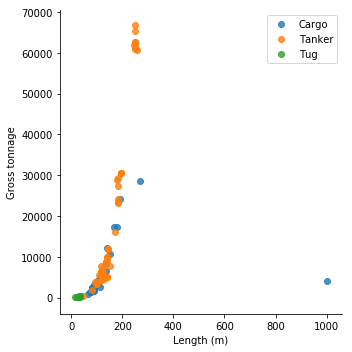

In [93]:
# Plotting a scatter plot using ship length and gross tonnage, using a different color for each ship type.

import matplotlib.pyplot as plt
import seaborn as sns
sns.lmplot( x="Length (m)", y="Gross tonnage", data=df, fit_reg=False, hue='Ship type', legend=False, scatter=True)
plt.legend(loc='upper right')

plt.show()
 


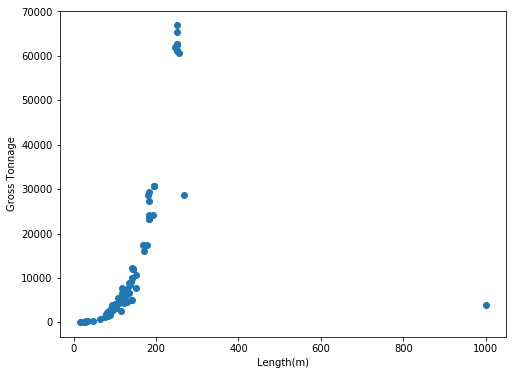

In [85]:
# Plotting a scatter plot using ship length and gross tonnage

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(df['Length (m)'], df['Gross tonnage'])
ax.set_xlabel('Length(m)')
ax.set_ylabel('Gross Tonnage')
plt.show()

In [32]:
# Are there any evident outliers? If so, delete the outliers 
# (or alternatively you can try to find the correct value from marinetraffic.com). 
# Do you need to use some transformation? If so, make the transformation.

# Finding outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

print(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))


     Breadth (m)  COG (degrees)  Destination  Gross tonnage  Length (m)  \
0          False          False         True          False       False   
1          False          False         True          False       False   
2          False          False         True          False        True   
3          False          False         True          False       False   
4          False          False         True          False       False   
5          False          False         True          False       False   
6          False          False         True          False       False   
7          False          False         True          False       False   
8          False          False         True          False       False   
9          False          False         True          False       False   
10         False          False         True          False       False   
11         False          False         True          False       False   
12         False         

In [31]:
# Removing outliers

df_removed_outlier=df.drop([2,48,60,80,82,83,90,91,93,96,97], axis=0)


In [33]:
#Checking whether the outliers are removed correctly or not

Q1 = df_removed_outlier.quantile(0.25)
Q3 = df_removed_outlier.quantile(0.75)
IQR = Q3 - Q1

print(df_removed_outlier < (Q1 - 1.5 * IQR)) |(df_removed_outlier > (Q3 + 1.5 * IQR))


     Breadth (m)  COG (degrees)  Destination  Gross tonnage  Length (m)  \
0          False          False         True          False       False   
1           True          False         True          False       False   
3          False          False         True          False       False   
4          False          False         True          False       False   
5          False          False         True          False       False   
6          False          False         True          False       False   
7          False          False         True          False       False   
8          False          False         True          False       False   
9          False          False         True          False       False   
10         False          False         True          False       False   
11         False          False         True          False       False   
12         False          False         True          False       False   
13         False         

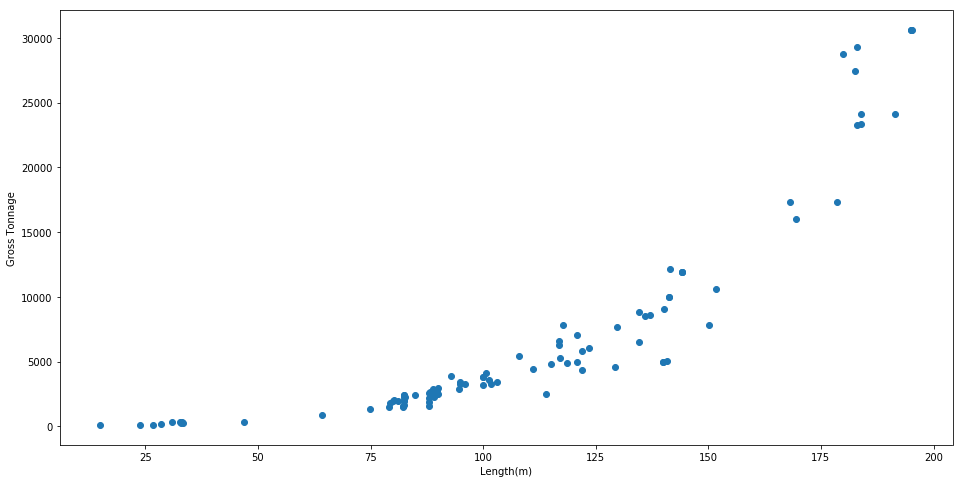

In [28]:

fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df_removed_outlier['Length (m)'], df_removed_outlier['Gross tonnage'])
ax.set_xlabel('Length(m)')
ax.set_ylabel('Gross Tonnage')
plt.show()

In [34]:
# Destination harbor is a categorical variable. Convert it as numerical. 

df_with_dummies = pd.get_dummies(dfnew['Destination'] )
df_with_dummies

,Hamina,Helsinki,Kotka,Kronshtadt,Kunda,Muuga,Paldiski,Porvoo,Primorsk,Tallinn,Ust-Luga,Valko Loviisa,Viipuri,Vuosaari,Vysotsk
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
#Importing necessary module
import numpy as np

destination = np.unique(dfnew['Destination'])
destination

array(['Hamina', 'Helsinki', 'Kotka', 'Kronshtadt', 'Kunda', 'Muuga',
       'Paldiski', 'Porvoo', 'Primorsk', 'Tallinn', 'Ust-Luga',
       'Valko Loviisa', 'Viipuri', 'Vuosaari', 'Vysotsk'], dtype=object)

In [94]:
#Importing necessary module
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
destination_labels = encoder.fit_transform(dfnew['Destination'])
destination_mappings = {index: label for index, label in 
                  enumerate(encoder.classes_)}
destination_mappings

{0: 'Hamina',
 1: 'Helsinki',
 2: 'Kotka',
 3: 'Kronshtadt',
 4: 'Kunda',
 5: 'Muuga',
 6: 'Paldiski',
 7: 'Porvoo',
 8: 'Primorsk',
 9: 'Tallinn',
 10: 'Ust-Luga',
 11: 'Valko Loviisa',
 12: 'Viipuri',
 13: 'Vuosaari',
 14: 'Vysotsk'}

In [95]:
df_removed_outlier['DestinationLabel'] = destination_labels
df_removed_outlier.head()

,MMSI,Speed (knots),COG (degrees),Destination,Ship type,Gross tonnage,Length (m),Breadth (m),DestinationLabel
0,236039000,10.1,74.9,Hamina,Cargo,2280,82.6,12.3,0
1,440363000,9.9,74.6,Hamina,Cargo,8521,136.0,32.0,0
3,246591000,9.2,74.6,Hamina,Cargo,8620,137.1,19.1,0
4,305929000,9.6,73.2,Hamina,Cargo,1905,87.9,11.4,0
5,636017466,8.6,67.5,Hamina,Cargo,1985,82.5,12.5,0


In [39]:
#Final DataFrame after preprocessing 
df_label_encoded = dfnew.drop('Destination', axis=1)
df_label_encoded

,MMSI,Speed (knots),COG (degrees),Ship type,Gross tonnage,Length (m),Breadth (m)
0,236039000,10.1000,74.9000,Cargo,2280,82.6,12.30
1,440363000,9.9000,74.6000,Cargo,8521,136.0,32.00
3,246591000,9.2000,74.6000,Cargo,8620,137.1,19.10
4,305929000,9.6000,73.2000,Cargo,1905,87.9,11.40
5,636017466,8.6000,67.5000,Cargo,1985,82.5,12.50
6,212209000,10.1000,64.3000,Cargo,3416,94.9,15.30
7,236029000,10.1000,73.4000,Cargo,2301,82.5,12.40
8,246169000,9.6000,73.3000,Cargo,2548,89.0,12.50
9,244850900,10.8000,73.5000,Cargo,6540,134.5,16.50
10,210434000,7.9000,66.8000,Cargo,1999,82.4,12.50


In [40]:
# The numerical variables have quite different ranges so it is good to make a Zscore standardization. 
# Perform it for speed, length, breadth and gross tonnage.

#Importing necessary module
from sklearn import preprocessing
x = df_label_encoded[['Speed (knots)','Gross tonnage','Length (m)','Breadth (m)']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled)
df_normalized



,0,1,2,3
0,0.550071,0.071379,0.375139,0.267988
1,0.530426,0.275728,0.671476,0.991189
2,0.461667,0.278969,0.677580,0.517621
3,0.500958,0.059101,0.404550,0.234949
4,0.402731,0.061720,0.374584,0.275330
5,0.550071,0.108575,0.443396,0.378120
6,0.550071,0.072067,0.374584,0.271659
7,0.500958,0.080155,0.410655,0.275330
8,0.618830,0.210864,0.663152,0.422173
9,0.333972,0.062179,0.374029,0.275330


In [42]:
#Task 2. Predict the ship type with the speed, destination, length, breadth and gross tonnage data using kNN classifier with k=3.
#Find an estimation for the classification accuracy using random training and test sets. 

# Importing necessary module
from sklearn.neighbors import KNeighborsClassifier

# Feature and the response variable
y = df_label_encoded['Ship type'].values
X = df_label_encoded.drop(['Ship type','MMSI', 'COG (degrees)'],  axis=1).values

# k-NN classifier with3 neighbors
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to the data
knn.fit(X,y)




KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [43]:
# Divide the data randomly into training (70 %) and test sets (30 %). Should you use stratification? Why? 

#Importing necessary module
from sklearn.model_selection import train_test_split


# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)
# Create a k-NN classifier with 3 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=3)
# Fit the classifier to the training data
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))


0.6551724137931034


In [44]:
# Task 3: Predict the ship type with the speed, destination, length, breadth and gross tonnage data 
# using kNN classifier with k=3. Find an estimation of the classification accuracy using leave-one-out. 
 
#Importing necessary module
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
print(scores)

[0.75       0.75       0.7        0.68421053 0.70588235]


In [45]:
# Find the optimal value for k

k_range = list(range(1, 20))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)



[0.6769659442724458, 0.6304953560371518, 0.7180185758513933, 0.7080185758513932, 0.7485448916408669, 0.7585448916408669, 0.7685448916408669, 0.7685448916408669, 0.768544891640867, 0.7885448916408669, 0.7885448916408669, 0.7885448916408669, 0.7780185758513932, 0.7780185758513932, 0.7269659442724458, 0.7069659442724459, 0.7174922600619196, 0.685201238390093, 0.7057275541795666]


Text(0,0.5,'Accuracy')

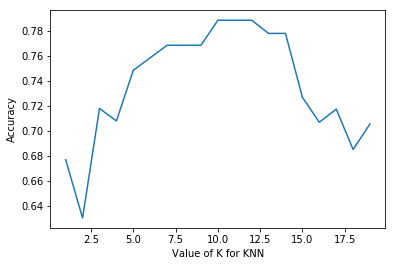

In [47]:

#Importing necessary module
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')

In [71]:
#Task 4: Predict the ship type with the speed, destination, length and gross tonnage data using kNN classifier with k=1..20.
#Use all ships in the preprocessed data for training. Use the same training data also to test the classifier. 
#Find an estimation for the classification accuracy. Plot the classification accuracy with different k values 
#acquired with leave-one-out and using training data in the same figure. Comment your result. 
#Why shouldn’t you test with your training data?

# Feature and the response variable
y = df['Ship type'].values
X = df[['Speed (knots)','Length (m)', 'Gross tonnage']].values

# k-NN classifier with 3 neighbors
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X, y)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [69]:
#Importing necessary module
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
loo.get_n_splits(X)


107

In [73]:
k_range = list(range(1, 20))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)


[0.6928138528138529, 0.6301298701298702, 0.7109956709956711, 0.6832900432900433, 0.7664069264069264, 0.7387012987012987, 0.7841558441558443, 0.7841558441558443, 0.7941125541125542, 0.8032034632034633, 0.8032034632034633, 0.8032034632034633, 0.7936796536796538, 0.7754978354978356, 0.7473593073593074, 0.7196536796536795, 0.7105627705627706, 0.71008658008658, 0.7287012987012986]


Text(0,0.5,'Accuracy')

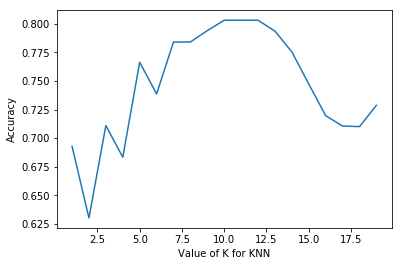

In [76]:
plt.plot(k_range, k_scores )
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')

In [77]:
# A bonus task: Implement nested-cross-validation for task 3 to estimate the classification accuracy of K-nn method 
#that selects the optimal value k=1… 20. If running leave-one-out inside leave-one-out takes too much time, 
#you can replace either inner or outer CV loop with 10-fold CV. Does the classification accuracy achieved differ from 
#the one obtained earlier?

# Create arrays for the features and the response variable
y = df_label_encoded['Ship type'].values
X = df_label_encoded.drop(['Ship type','MMSI', 'COG (degrees)'],  axis=1).values

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to the data
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [80]:
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

[0.8        0.7        0.9        0.7        0.9        0.7
 0.6        0.8        0.88888889 0.57142857]


In [81]:
k_range = list(range(1, 20))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.6860317460317461, 0.6646031746031746, 0.7260317460317461, 0.7260317460317459, 0.756031746031746, 0.746031746031746, 0.766031746031746, 0.7760317460317461, 0.766031746031746, 0.7860317460317461, 0.7860317460317461, 0.7860317460317461, 0.7860317460317461, 0.7860317460317461, 0.7760317460317461, 0.7860317460317461, 0.7760317460317461, 0.7049206349206348, 0.7049206349206348]


Text(0,0.5,'Accuracy')

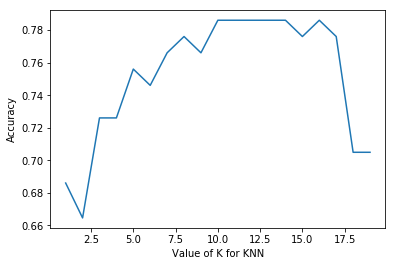

In [82]:
plt.plot(k_range, k_scores )
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')